In [ ]:
import grpc

import tensorflow as tf

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

In [ ]:
host = 'localhost:8500'
channel = grpc.insecure_channel(host)
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [ ]:
from keras_image_helper import create_preprocessor

In [ ]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [ ]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
X

array([[[[-0.11372548, -0.15294117, -0.19999999],
         [-0.11372548, -0.15294117, -0.19999999],
         [-0.10588235, -0.14509803, -0.19215685],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.04313725, -0.04313725, -0.10588235],
         [-0.11372548, -0.11372548, -0.17647058]],

        [[-0.09019607, -0.12941176, -0.17647058],
         [-0.09019607, -0.12941176, -0.17647058],
         [-0.08235294, -0.12156862, -0.16862744],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.04313725, -0.04313725, -0.10588235],
         [-0.10588235, -0.10588235, -0.16862744]],

        [[-0.09803921, -0.1372549 , -0.18431371],
         [-0.09803921, -0.1372549 , -0.18431371],
         [-0.09019607, -0.12941176, -0.17647058],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.03529412, -0.03529412, -0.09803921],
         [-0.09019607, -0.09019607, -0.15294117]],

        ...,

        [[-0.67058825, -0.7019608 , -0

Which image we're working with?

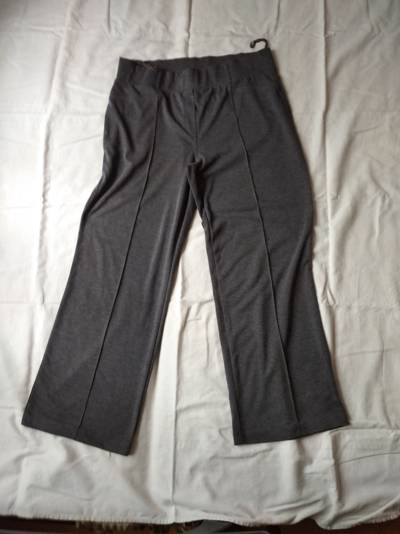

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [ ]:
# Convert numpy array into protobuf:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

In [ ]:
# Make prediction with tf serving:
pb_request = predict_pb2.PredictRequest()

pb_request.model_spec.name = 'clothing-model'
pb_request.model_spec.signature_name = 'serving_default'
pb_request.inputs['input_8'].CopyFrom(np_to_protobuf(X))

We've prepared the request:
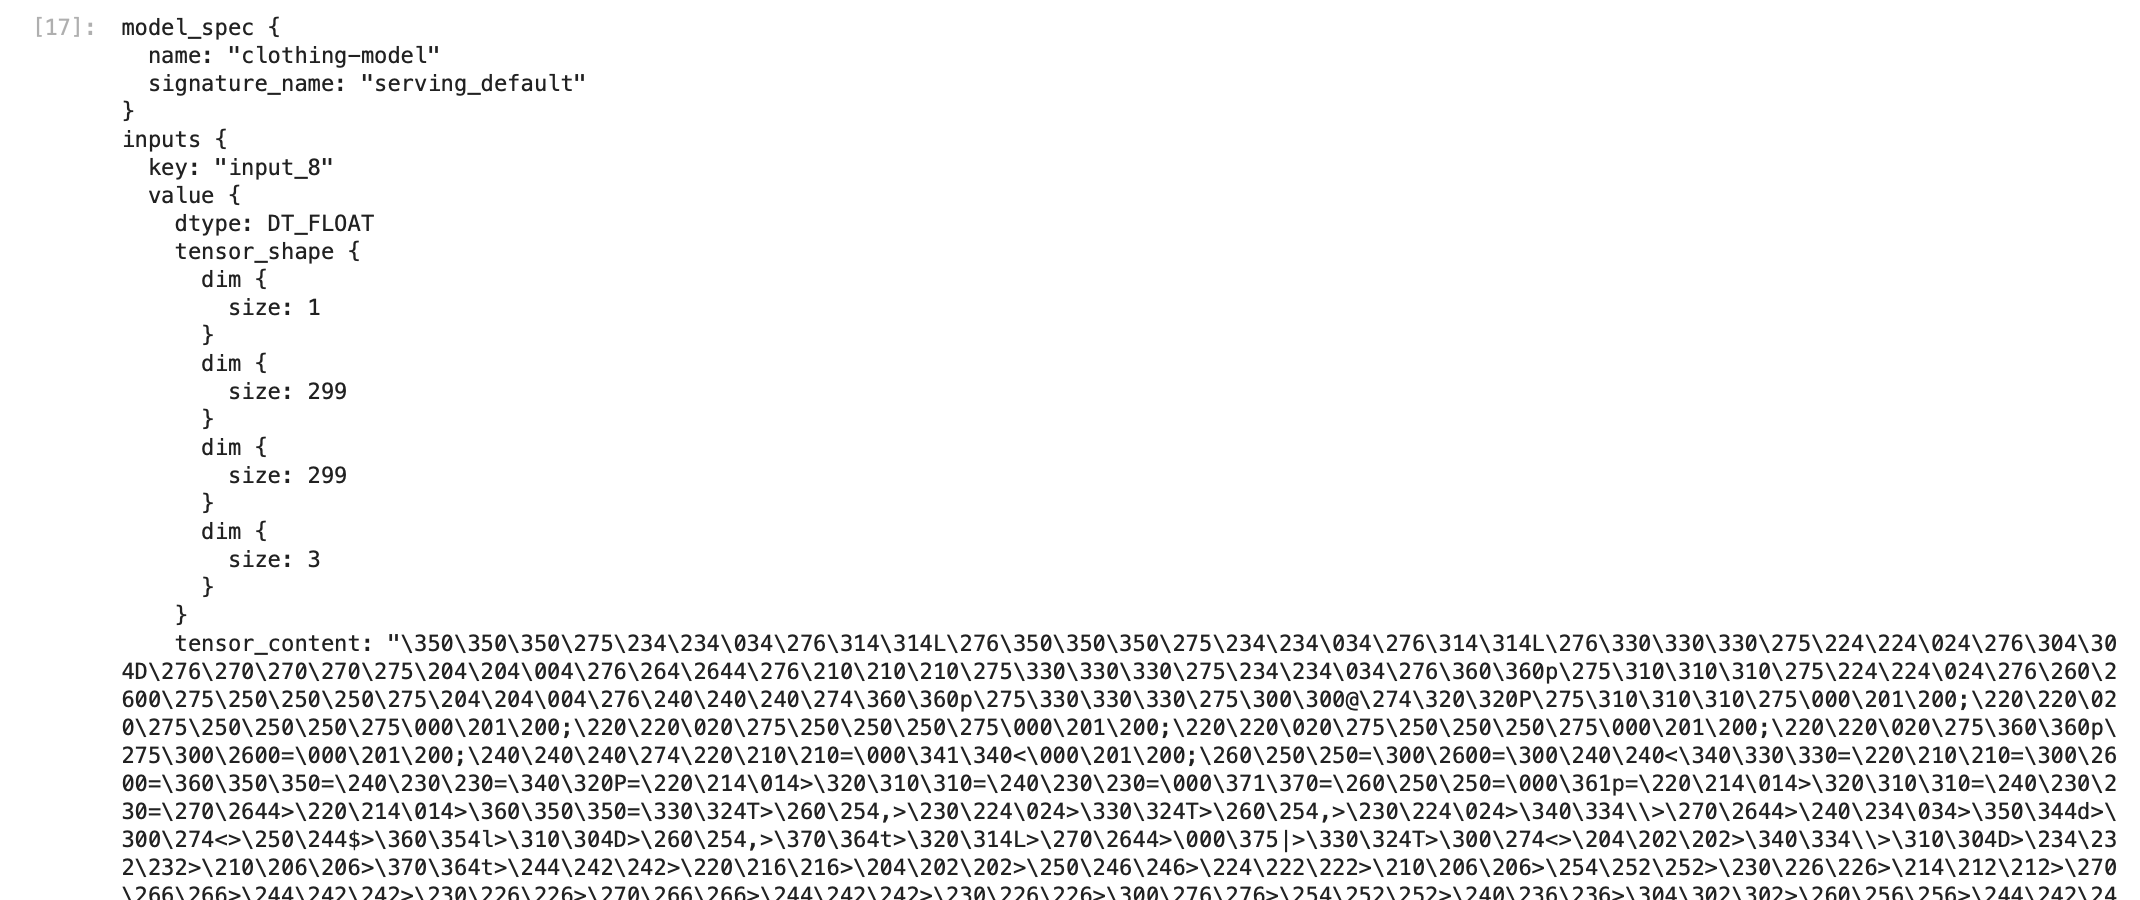

In [ ]:
pb_response = stub.Predict(pb_request, timeout=20.0)

In [ ]:
pb_response

outputs {
  key: "dense_7"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 10
      }
    }
    float_val: -1.8798645
    float_val: -4.756311
    float_val: -2.3595345
    float_val: -1.089263
    float_val: 9.903784
    float_val: -2.826181
    float_val: -3.6483097
    float_val: 3.2411568
    float_val: -2.6120958
    float_val: -4.8520346
  }
}
model_spec {
  name: "clothing-model"
  version {
    value: 1
  }
  signature_name: "serving_default"
}

In [ ]:
preds = pb_response.outputs['dense_7'].float_val

In [ ]:
preds

[-1.8798644542694092, -4.756310939788818, -2.359534502029419, -1.0892629623413086, 9.903783798217773, -2.826180934906006, -3.6483097076416016, 3.241156816482544, -2.612095832824707, -4.852034568786621]

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, preds))

{'dress': -1.8798644542694092,
 'hat': -4.756310939788818,
 'longsleeve': -2.359534502029419,
 'outwear': -1.0892629623413086,
 'pants': 9.903783798217773,
 'shirt': -2.826180934906006,
 'shoes': -3.6483097076416016,
 'shorts': 3.241156816482544,
 'skirt': -2.612095832824707,
 't-shirt': -4.852034568786621}